## Data analysis

In [88]:
from pathlib import Path
from typing import List


In [89]:
TRAIN_DATA_DIR = './data/raw/training'
TEST_DATA_DIR = './data/raw/testing'

### Data classes and classes imbalance

In [99]:
def check_data_folder(folder: Path) -> List[dict]:
    """
    Check data folder with classes subfolders. Calculate quantity of elements for each data class.
    :param folder: folder with data (for each class - separate subfolder
    :return: list with dicts:
        'class_name': class name (equal to subfolder name)
        'qnty': elements quantity
    """
    if not folder.is_dir():
        return []
    class_list =  []
    for subfolder in sorted(folder.iterdir()):
        if subfolder.is_dir():
            class_list.append({
                'class_name': str(subfolder.name),
                'qnty': len(list(subfolder.glob('*.*')))
            })
    return class_list

In [91]:
def print_data_results(class_list: List[dict]) -> None:
    """
    Print result of data quantity analysis.
    :param class_list: list with dicts:
        'class_name': class name (equal to subfolder name)
        'qnty': elements quantity
    :return:
    """
    all_qnty = sum([class_['qnty'] for class_ in class_list])
    for data_class in class_list:
        print(f"Class {data_class['class_name']}: elements qnty: {data_class['qnty']}, percentage: {data_class['qnty'] / all_qnty:.4f}.")

In [92]:
train_path = Path(TRAIN_DATA_DIR)
print("Train data:")
print_data_results(check_data_folder(train_path))

Train data:
Class 0: elements qnty: 5923, percentage: 0.0987.
Class 1: elements qnty: 6742, percentage: 0.1124.
Class 2: elements qnty: 5958, percentage: 0.0993.
Class 3: elements qnty: 6131, percentage: 0.1022.
Class 4: elements qnty: 5842, percentage: 0.0974.
Class 5: elements qnty: 5421, percentage: 0.0903.
Class 6: elements qnty: 5918, percentage: 0.0986.
Class 7: elements qnty: 6265, percentage: 0.1044.
Class 8: elements qnty: 5851, percentage: 0.0975.
Class 9: elements qnty: 5949, percentage: 0.0992.


In [93]:
test_path = Path(TEST_DATA_DIR)
print("Test data:")
print_data_results(check_data_folder(test_path))

Test data:
Class 0: elements qnty: 980, percentage: 0.0980.
Class 1: elements qnty: 1135, percentage: 0.1135.
Class 2: elements qnty: 1032, percentage: 0.1032.
Class 3: elements qnty: 1010, percentage: 0.1010.
Class 4: elements qnty: 982, percentage: 0.0982.
Class 5: elements qnty: 892, percentage: 0.0892.
Class 6: elements qnty: 958, percentage: 0.0958.
Class 7: elements qnty: 1028, percentage: 0.1028.
Class 8: elements qnty: 974, percentage: 0.0974.
Class 9: elements qnty: 1009, percentage: 0.1009.


In [94]:
print(f"Train file types: {set([file.suffix for file in train_path.rglob('*.*')])}")
print(f"Test file types: {set([file.suffix for file in train_path.rglob('*.*')])}")

Train file types: {'.png'}
Test file types: {'.png'}


### Data examples

In [95]:
import torch
import torchvision
from torchvision.utils import make_grid
from torchvision.io import read_image
from random import choices
IMG_QNTY = 128

In [96]:
import matplotlib.pyplot as plt
import numpy as np
def plt_imshow(img: torch.Tensor, title: str):
    npimg = img.numpy()
    plt.title(title)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

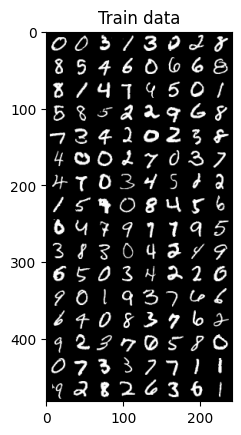

In [97]:
img_list = [read_image(str(img_path)) for img_path in choices(list(train_path.rglob('*.*')), k=IMG_QNTY)]
img_grid = make_grid(img_list)
plt_imshow(img_grid, 'Train data')

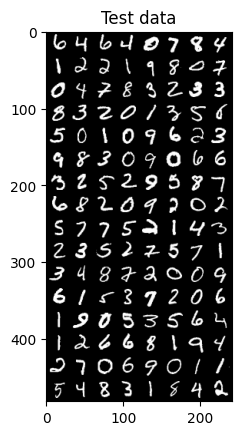

In [98]:
img_list = [read_image(str(img_path)) for img_path in choices(list(test_path.rglob('*.*')), k=IMG_QNTY)]
img_grid = make_grid(img_list)
plt_imshow(img_grid, 'Test data')